In [1]:
from qiskit import qpy
from qiskit.circuit import QuantumCircuit
from qiskit.primitives import StatevectorSampler
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp
import numpy as np
import matplotlib.pyplot as plt
from QuditsOnQubits import create_ame43, create_graph_ghz, create_ghz
from qiskit_aer.primitives import Estimator as AerEstimator
from qiskit_ibm_runtime import QiskitRuntimeService

In [3]:
backend = QiskitRuntimeService().backend("ibm_aachen")
backend.name

'ibm_aachen'

In [4]:
with open('Zgate.qpy', 'rb') as fd:
    Zgate = qpy.load(fd)[0]

with open('Xgate.qpy', 'rb') as fd:
    Xgate = qpy.load(fd)[0]

with open('Fgate.qpy', 'rb') as fd:
    Fgate = qpy.load(fd)[0]

with open('CZ.qpy', 'rb') as fd:
    CZgate = qpy.load(fd)[0]

with open('FDAGgate.qpy', 'rb') as fd:
    FDAGgate = qpy.load(fd)[0]

In [5]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
import igraph as ig

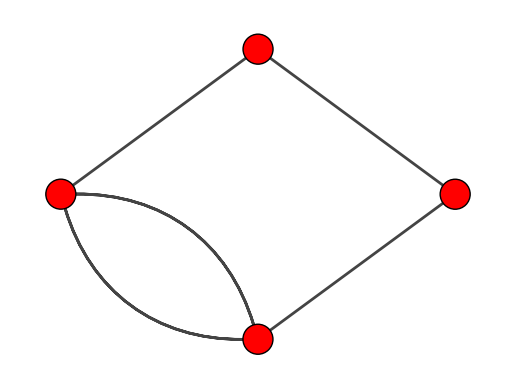

In [4]:
sq = ig.Graph()
sq.add_vertices(4)
sq.add_edges([(0, 1), (1, 2), (2, 3), (2, 3), (3, 0)])

fig, ax = plt.subplots()
ig.plot(sq, target=ax)

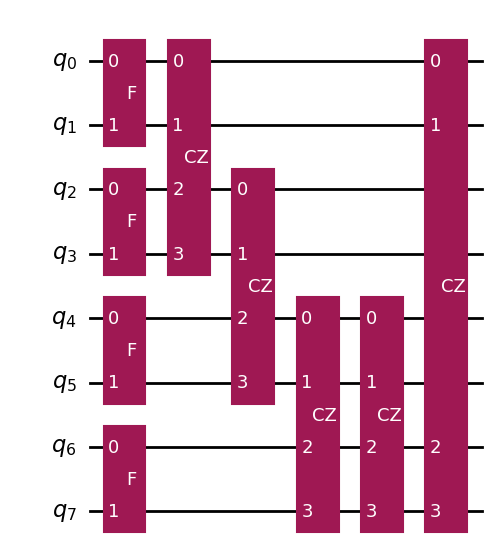

In [6]:
ame43_qc = create_graph_ghz(sq)
ame43_qc.draw('mpl')

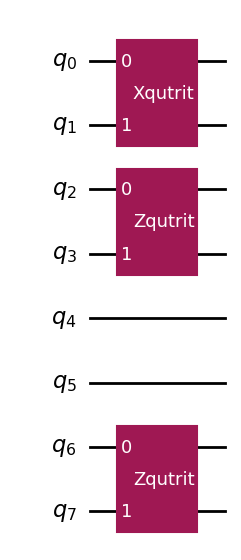

In [15]:
stab_ame43_1 = QuantumCircuit(8)
stab_ame43_1.append(Xgate, [0, 1])
stab_ame43_1.append(Zgate, [2, 3])
stab_ame43_1.append(Zgate, [6, 7])

op_ame43_1 = SparsePauliOp.from_operator(Operator(stab_ame43_1))

stab_ame43_1.draw('mpl')

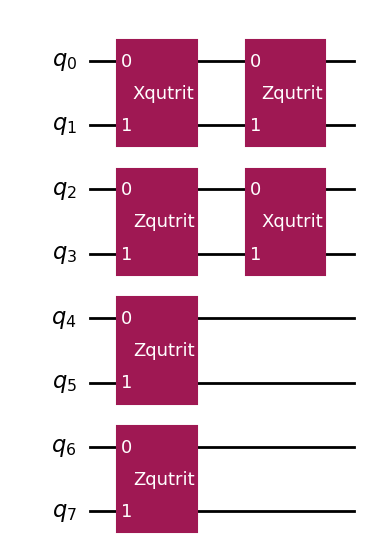

In [16]:
stab_ame43_2 = QuantumCircuit(8)
stab_ame43_2.append(Xgate, [0, 1])
stab_ame43_2.append(Zgate, [0, 1])
stab_ame43_2.append(Zgate, [2, 3])
stab_ame43_2.append(Xgate, [2, 3])
stab_ame43_2.append(Zgate, [4, 5])
stab_ame43_2.append(Zgate, [6, 7])

op_ame43_2 = SparsePauliOp.from_operator(Operator(stab_ame43_2))

stab_ame43_2.draw('mpl')

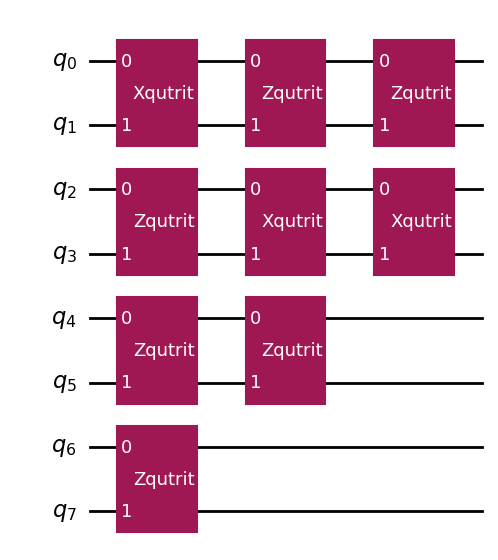

In [17]:
stab_ame43_3 = QuantumCircuit(8)
stab_ame43_3.append(Xgate, [0, 1])
stab_ame43_3.append(Zgate, [0, 1])
stab_ame43_3.append(Zgate, [0, 1])
stab_ame43_3.append(Zgate, [2, 3])
stab_ame43_3.append(Xgate, [2, 3])
stab_ame43_3.append(Xgate, [2, 3])
stab_ame43_3.append(Zgate, [4, 5])
stab_ame43_3.append(Zgate, [4, 5])
stab_ame43_3.append(Zgate, [6, 7])

op_ame43_3 = SparsePauliOp.from_operator(Operator(stab_ame43_3))

stab_ame43_3.draw('mpl')

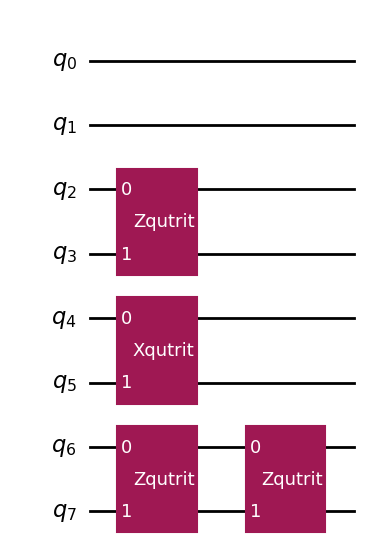

In [18]:
stab_ame43_4 = QuantumCircuit(8)
stab_ame43_4.append(Zgate, [2, 3])
stab_ame43_4.append(Xgate, [4, 5])
stab_ame43_4.append(Zgate, [6, 7])
stab_ame43_4.append(Zgate, [6, 7])

op_ame43_4 = SparsePauliOp.from_operator(Operator(stab_ame43_4))

stab_ame43_4.draw('mpl')

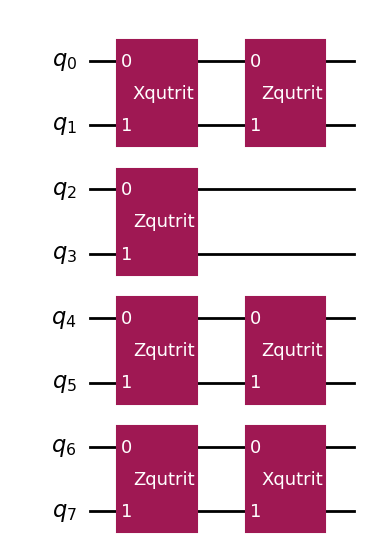

In [19]:
stab_ame43_5 = QuantumCircuit(8)
stab_ame43_5.append(Xgate, [0, 1])
stab_ame43_5.append(Zgate, [0, 1])
stab_ame43_5.append(Zgate, [2, 3])
stab_ame43_5.append(Zgate, [4, 5])
stab_ame43_5.append(Zgate, [4, 5])
stab_ame43_5.append(Zgate, [6, 7])
stab_ame43_5.append(Xgate, [6, 7])

op_ame43_5 = SparsePauliOp.from_operator(Operator(stab_ame43_5))

stab_ame43_5.draw('mpl')

In [13]:
target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

In [7]:

ame43_isa_circuit = pm.run(ame43_qc)

NameError: name 'backend' is not defined

In [21]:
ame43_isa_circuit.draw('mpl', idleWires=False)

TypeError: QuantumCircuit.draw() got an unexpected keyword argument 'idleWires'

In [6]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import Batch

In [7]:
estimator = Estimator(mode=backend)

In [24]:
pub = (ame43_isa_circuit, op_ame43_1)

In [25]:
isa_observable = op_ame43_1.apply_layout(layout=ame43_isa_circuit.layout)

In [ ]:
isa_observable

In [27]:
A = (0.5 * (op_ame43_1 + op_ame43_1.adjoint()))
B = (-0.5j * (op_ame43_1 - op_ame43_1.adjoint()))

In [28]:
A.equiv(A.conjugate().transpose())

True

In [29]:
B.equiv(B.conjugate().transpose())

True

In [30]:
isa_observable_A = A.apply_layout(layout=ame43_isa_circuit.layout)
isa_observable_B = B.apply_layout(layout=ame43_isa_circuit.layout)

In [47]:
job_result = estimator.run([(ame43_isa_circuit, isa_observable_A)]).result()

C:\Users\szymon\.conda\envs\qudityPAN\lib\site-packages\qiskit_ibm_runtime\qiskit_runtime_service.py:863: UserWarning: IBM Quantum Platform is moving, and this version will be sunset on July 1. To get started on the new platform, read the migration guide at https://docs.quantum.ibm.com/migration-guides/classic-iqp-to-cloud-iqp
  warnings.warn(warning_message)


In [54]:
job_result[0].data.evs

array(-0.03683445)

In [59]:
op_list = [op_ame43_1, op_ame43_2,op_ame43_3, op_ame43_4, op_ame43_5]
A_list = []
B_list = []

for i in op_list:
    a = 0.5 * (i + i.adjoint())
    b = -0.5j * (i - i.adjoint())

    isa_a = a.apply_layout(layout=ame43_isa_circuit.layout)
    isa_b = b.apply_layout(layout=ame43_isa_circuit.layout)

    A_list.append(isa_a)
    B_list.append(isa_b)

In [ ]:
evs_list_A = []

with Batch(backend=backend):
    estimator = Estimator(mode=backend)
    for A in A_list:
        job_result = estimator.run([(ame43_isa_circuit, A)]).result()
        result = job_result[0].data.evs
        evs_list_A.append(result)

Two qutrit IBMQ test

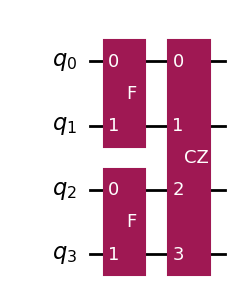

In [8]:
qc_2qutrit = QuantumCircuit(4)
qc_2qutrit.append(Fgate, [0, 1])
qc_2qutrit.append(Fgate, [2, 3])
qc_2qutrit.append(CZgate, [0, 1, 2, 3])
qc_2qutrit.draw('mpl')

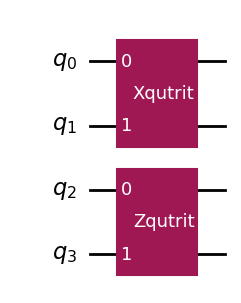

In [9]:
stabqc = QuantumCircuit(4)
stabqc.append(Xgate, [0, 1])
stabqc.append(Zgate, [2, 3])
stabqc.draw('mpl')

In [31]:
from qiskit.transpiler import TranspilerError
from qiskit.transpiler.preset_passmanagers.plugin import list_stage_plugins


def translation_opti(qc):
    list_plugins = list_stage_plugins("translation")

    list_of_best = np.zeros(len(list_plugins))
    k = 0
    pm_trans = generate_preset_pass_manager(target=target, optimization_level=3, translation_method=list_plugins[0])
    best_qc = pm_trans.run(qc)
    for name_plugin in list_plugins:
        try:
            print(f'-------- {name_plugin} --------')
            for i in range(100):
                temp_qc = pm_trans.run(qc)
                if temp_qc.depth() < best_qc.depth():
                    best_qc = temp_qc.copy()
                    list_of_best[k] = best_qc.depth()
                    print(best_qc.depth())
        except TranspilerError:
            print(f'TranspilerError {name_plugin}')
            continue
    return best_qc

In [32]:
best_2_qc = translation_opti(qc_2qutrit)

-------- default --------
-------- synthesis --------
-------- translator --------
-------- ibm_backend --------
-------- ibm_dynamic_circuits --------
-------- ibm_fractional --------


In [33]:
best_2_qc.depth()

59

In [16]:
A_op = (0.5 * (Operator(stabqc) + Operator(stabqc).adjoint()))
#B = (-0.5j * (op_sp - op_sp.adjoint()))

A = SparsePauliOp.from_operator(A_op)

isa_2qutrit_qc = pm.run(qc_2qutrit)
isa_2qutrit_observable_A_qc = A.apply_layout(layout=isa_2qutrit_qc.layout)
isa_2qutrit_observable_B_qc = B.apply_layout(layout=isa_2qutrit_qc.layout)

In [34]:
isa_2qutrit_qc.depth()

59

In [17]:
isa_2qutrit_qc = pm.run(qc_2qutrit)
isa_2qutrit_observable_A_qc = A.apply_layout(layout=isa_2qutrit_qc.layout)
isa_2qutrit_observable_B_qc = B.apply_layout(layout=isa_2qutrit_qc.layout)

In [18]:
np.iscomplexobj(np.real_if_close(isa_2qutrit_observable_A_qc[0][0].coeffs))

False

Aer Simulator

In [20]:
est = AerEstimator()
est.options.default_shots = 10_000

In [49]:
job = est.run(isa_2qutrit_qc, isa_2qutrit_observable_A_qc)
exp_val = job.result().values[0]
exp_val.round(3)

np.float64(0.985)

In [51]:
job = est.run(isa_2qutrit_qc, isa_2qutrit_observable_B_qc)
exp_val = job.result().values[0]
exp_val.round(3)

np.float64(-0.041)

IBMQ Brussels - eagle r3

In [19]:
pub = (isa_2qutrit_qc, [[isa_2qutrit_observable_A_qc]])
job_result_2qutrit = estimator.run(pubs=[pub]).result()

In [20]:
job_result_2qutrit[0].data.evs #to jest czesc rzeczywista naszej wartosci oczekiwanej

array([[1.07985022]])

In [21]:
job_result_2qutrit[0].data.stds

array([[0.0138111]])

In [58]:
pub = (isa_2qutrit_qc, [[isa_2qutrit_observable_B_qc]])
job_result_2qutrit = estimator.run(pubs=[pub]).result()
job_result_2qutrit[0].data.evs # to jest cz. urojona

array([[-0.049344]])

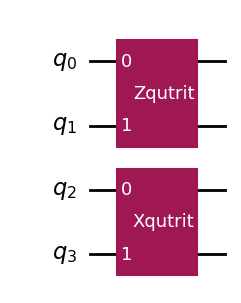

In [22]:
stabqc2 = QuantumCircuit(4)
stabqc2.append(Zgate, [0, 1])
stabqc2.append(Xgate, [2, 3])
stabqc2.draw('mpl')

In [24]:
A_op2 = (0.5 * (Operator(stabqc2) + Operator(stabqc2).adjoint()))
#B = (-0.5j * (op_sp - op_sp.adjoint()))

A2 = SparsePauliOp.from_operator(A_op2)

isa_2qutrit_qc2 = pm.run(qc_2qutrit)
isa_2qutrit_observable_A_qc2 = A.apply_layout(layout=isa_2qutrit_qc2.layout)
isa_2qutrit_observable_B_qc = B.apply_layout(layout=isa_2qutrit_qc.layout)

In [25]:
np.iscomplexobj(np.real_if_close(isa_2qutrit_observable_A_qc2[0][0].coeffs))

False

In [66]:
'''
Simulator dla A
'''

job = est.run(isa_2qutrit_qc, isa_2qutrit_observable_A2_qc)
exp_val = job.result().values[0]
exp_val.round(3)

np.float64(0.995)

In [67]:
'''
Simulator dla B
'''

job = est.run(isa_2qutrit_qc, isa_2qutrit_observable_B2_qc)
exp_val = job.result().values[0]
exp_val.round(3)

np.float64(0.004)

In [35]:
'''
Real IBMQ brussels, real part of exp val
'''

pub = (isa_2qutrit_qc, [[isa_2qutrit_observable_A_qc2]])
job_result_2qutrit = estimator.run(pubs=[pub]).result()
job_result_2qutrit[0].data.evs

array([[1.11993745]])

In [29]:
job_result_2qutrit[0].data.stds

array([[0.01483911]])

In [36]:
from qiskit.transpiler.passes.scheduling import (
    ALAPScheduleAnalysis,
    PadDynamicalDecoupling,
)
from qiskit.transpiler import PassManager
from qiskit.visualization import timeline_drawer
from qiskit.circuit.library import XGate, YGate

In [37]:
X = XGate()
Y = YGate()

dd_sequence = [X, Y, X, Y]

In [38]:
target = backend.target

basis_gates = list(target.operation_names)
basis_gates

['id', 'delay', 'cz', 'x', 'sx', 'measure', 'reset', 'rz']

In [39]:
from qiskit.transpiler import InstructionProperties

y_gate_properties = {}
for qubit in range(target.num_qubits):
    y_gate_properties.update(
        {
            (qubit,): InstructionProperties(
                duration=target["x"][(qubit,)].duration,
                error=target["x"][(qubit,)].error,
            )
        }
    )

target.add_instruction(YGate(), y_gate_properties)

In [40]:
dd_pm = PassManager(
    [
        ALAPScheduleAnalysis(target=target),
        PadDynamicalDecoupling(target=target, dd_sequence=dd_sequence),
    ]
)

In [41]:
isa_2qutrit_qc_dd = dd_pm.run(isa_2qutrit_qc)

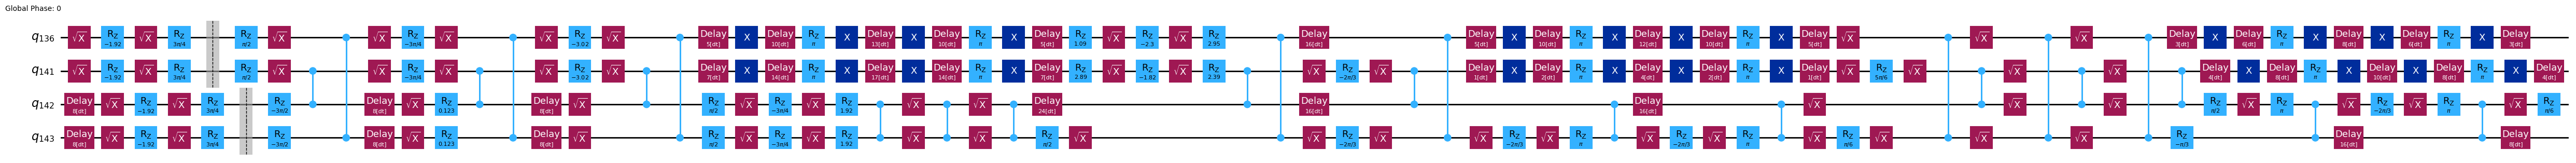

In [42]:
from qiskit.circuit.equivalence_library import (
    SessionEquivalenceLibrary as sel,
)
from qiskit.transpiler.passes import BasisTranslator

isa_2qutrit_qc_dd = BasisTranslator(sel, basis_gates)(isa_2qutrit_qc_dd)
isa_2qutrit_qc_dd.draw("mpl", fold=-1, idle_wires=False)

In [43]:
estimator.options.max_execution_time = 600

In [44]:
pub = (isa_2qutrit_qc_dd, [[isa_2qutrit_observable_A_qc]])
job_result_2qutrit = estimator.run(pubs=[pub]).result()
job_result_2qutrit[0].data.evs

array([[1.09302205]])

In [48]:
service = QiskitRuntimeService()
job = service.job('d1t31k07pqbs738gb1ig')
job_result = job.result()[0].data.evs

In [49]:
job_result

array([[1.09302205]])

In [50]:
job.result()[0].data.stds

array([[0.01387815]])

In [45]:
pub = (isa_2qutrit_qc_dd, [[isa_2qutrit_observable_A_qc2]])
job_result_2qutrit = estimator.run(pubs=[pub]).result()
job_result_2qutrit[0].data.evs

array([[1.08787044]])

In [51]:
job_result_2qutrit[0].data.stds

array([[0.01408867]])

In [69]:
'''
Real IBMQ brussels, imaginary part of exp val
'''

pub = (isa_2qutrit_qc, [[isa_2qutrit_observable_B2_qc]])
job_result_2qutrit = estimator.run(pubs=[pub]).result()
job_result_2qutrit[0].data.evs

array([[-0.00579097]])

GHZ 3 qutrit

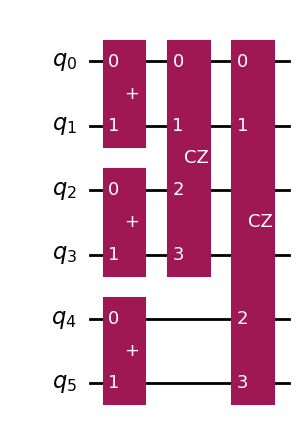

In [37]:
ghz_qc = create_ghz()
ghz_qc = ghz_qc[0]
ghz_qc.draw('mpl')

In [35]:
'''
Stabilizator XZZ
'''

stab_ghz1 = QuantumCircuit(6)
stab_ghz1.append(Xgate, [0, 1])
stab_ghz1.append(Zgate, [2, 3])
stab_ghz1.append(Zgate, [4, 5])

op_stabghz1 = SparsePauliOp.from_operator(Operator(stab_ghz1))

'''
Stabilizator ZXI
'''

stab_ghz2 = QuantumCircuit(6)
stab_ghz2.append(Zgate, [0, 1])
stab_ghz2.append(Xgate, [2, 3])

op_stabghz2 = SparsePauliOp.from_operator(Operator(stab_ghz2))

'''
Stabilizator ZIX
'''

stab_ghz3 = QuantumCircuit(6)
stab_ghz3.append(Zgate, [0, 1])
stab_ghz3.append(Xgate, [4, 5])

op_stabghz3 = SparsePauliOp.from_operator(Operator(stab_ghz3))

In [36]:
'''
Transpiled ghz qc
'''

isa_ghz_qc = pm.run(ghz_qc)

NameError: name 'ghz_qc' is not defined

In [45]:
'''
A - real expectation value part
B - imaginary expectation value part
'''

A_ghz_1 = (0.5 * (op_stabghz1 + op_stabghz1.adjoint()))
B_ghz_1 = (-0.5j * (op_stabghz1 - op_stabghz1.adjoint()))

isa_ghz_observable_A1 = A_ghz_1.apply_layout(layout=isa_ghz_qc.layout)
isa_ghz_observable_B1 = B_ghz_1.apply_layout(layout=isa_ghz_qc.layout)

A_ghz_2 = (0.5 * (op_stabghz2 + op_stabghz2.adjoint()))
B_ghz_2 = (-0.5j * (op_stabghz2 - op_stabghz2.adjoint()))

isa_ghz_observable_A2 = A_ghz_2.apply_layout(layout=isa_ghz_qc.layout)
isa_ghz_observable_B2 = B_ghz_2.apply_layout(layout=isa_ghz_qc.layout)

A_ghz_3 = (0.5 * (op_stabghz3 + op_stabghz3.adjoint()))
B_ghz_3 = (-0.5j * (op_stabghz3 - op_stabghz3.adjoint()))

isa_ghz_observable_A3 = A_ghz_3.apply_layout(layout=isa_ghz_qc.layout)
isa_ghz_observable_B3 = B_ghz_3.apply_layout(layout=isa_ghz_qc.layout)

Aer Simulator

In [78]:
job = est.run(isa_ghz_qc, isa_ghz_observable_A1)
exp_val = job.result().values[0]
exp_val.round(3)

np.float64(1.008)

In [85]:
job = est.run(isa_ghz_qc, isa_ghz_observable_B1)
exp_val = job.result().values[0]
exp_val.round(3)

np.float64(-0.044)

In [81]:
job = est.run(isa_ghz_qc, isa_ghz_observable_A2)
exp_val = job.result().values[0]
exp_val.round(3)

np.float64(0.97)

In [82]:
job = est.run(isa_ghz_qc, isa_ghz_observable_B2)
exp_val = job.result().values[0]
exp_val.round(3)

np.float64(-0.014)

In [83]:
job = est.run(isa_ghz_qc, isa_ghz_observable_A3)
exp_val = job.result().values[0]
exp_val.round(3)

np.float64(1.011)

In [84]:
job = est.run(isa_ghz_qc, isa_ghz_observable_B3)
exp_val = job.result().values[0]
exp_val.round(3)

np.float64(-0.012)

IMBQ brussels - eagle r3

In [86]:
pub = (isa_ghz_qc, [[isa_ghz_observable_A1]])
job_result_ghz_A1 = estimator.run(pubs=[pub]).result()
job_result_ghz_A1[0].data.evs

array([[0.50911705]])

In [87]:
pub = (isa_ghz_qc, [[isa_ghz_observable_B1]])
job_result_ghz_B1 = estimator.run(pubs=[pub]).result()
job_result_ghz_B1[0].data.evs

array([[-0.00720244]])

In [88]:
pub = (isa_ghz_qc, [[isa_ghz_observable_A2]])
job_result_ghz_A2 = estimator.run(pubs=[pub]).result()
job_result_ghz_A2[0].data.evs

array([[-0.0646527]])

In [89]:
pub = (isa_ghz_qc, [[isa_ghz_observable_B2]])
job_result_ghz_B2 = estimator.run(pubs=[pub]).result()
job_result_ghz_B2[0].data.evs

array([[-0.26017627]])

In [90]:
pub = (isa_ghz_qc, [[isa_ghz_observable_A3]])
job_result_ghz_A3 = estimator.run(pubs=[pub]).result()
job_result_ghz_A3[0].data.evs

array([[0.75694637]])

In [91]:
pub = (isa_ghz_qc, [[isa_ghz_observable_B3]])
job_result_ghz_B3 = estimator.run(pubs=[pub]).result()
job_result_ghz_B3[0].data.evs

array([[0.22977334]])

In [92]:
service.backends()

[<IBMBackend('ibm_brussels')>,
 <IBMBackend('ibm_strasbourg')>,
 <IBMBackend('ibm_aachen')>]

In [39]:
backend = service.backend('ibm_aachen')
backend.name

'ibm_aachen'

IBMQ Aachen - Heron r2

In [40]:
target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

In [41]:
estimator = Estimator(mode=backend)

In [42]:
isa_ghz_qc = pm.run(ghz_qc)

In [43]:
isa_ghz_qc.depth()

83

In [46]:
isa_ghz_observable_A1 = A_ghz_1.apply_layout(layout=isa_ghz_qc.layout)
isa_ghz_observable_B1 = B_ghz_1.apply_layout(layout=isa_ghz_qc.layout)

isa_ghz_observable_A2 = A_ghz_2.apply_layout(layout=isa_ghz_qc.layout)
isa_ghz_observable_B2 = B_ghz_2.apply_layout(layout=isa_ghz_qc.layout)

isa_ghz_observable_A3 = A_ghz_3.apply_layout(layout=isa_ghz_qc.layout)
isa_ghz_observable_B3 = B_ghz_3.apply_layout(layout=isa_ghz_qc.layout)

Aer simulator Aachen layout

In [100]:
job = est.run(isa_ghz_qc, isa_ghz_observable_A1)
exp_val = job.result().values[0]
exp_val.round(3)

np.float64(1.026)

In [101]:
job = est.run(isa_ghz_qc, isa_ghz_observable_B1)
exp_val = job.result().values[0]
exp_val.round(3)

np.float64(-0.012)

In [102]:
job = est.run(isa_ghz_qc, isa_ghz_observable_A2)
exp_val = job.result().values[0]
exp_val.round(3)

np.float64(1.012)

In [103]:
job = est.run(isa_ghz_qc, isa_ghz_observable_B2)
exp_val = job.result().values[0]
exp_val.round(3)

np.float64(0.012)

In [104]:
job = est.run(isa_ghz_qc, isa_ghz_observable_A3)
exp_val = job.result().values[0]
exp_val.round(3)

np.float64(0.998)

In [105]:
job = est.run(isa_ghz_qc, isa_ghz_observable_B3)
exp_val = job.result().values[0]
exp_val.round(3)

np.float64(-0.025)

IBM Aachen

In [47]:
pubs = []

isa_observables_A = [[isa_ghz_observable_A1], [isa_ghz_observable_A2], [isa_ghz_observable_A3]]

pub = (isa_ghz_qc, isa_observables_A)

In [ ]:
job_result_ghz_A_observables = estimator.run(pubs=[pub]).result()
job_result_ghz_A_observables[0].data.evs

In [111]:
isa_observables_B = [[isa_ghz_observable_B1], [isa_ghz_observable_B2], [isa_ghz_observable_B3]]

pub = (isa_ghz_qc, isa_observables_B)

In [112]:
job_result_ghz_B_observables = estimator.run(pubs=[pub]).result()
job_result_ghz_B_observables[0].data.evs

array([[ 0.00782761],
       [-0.00461868],
       [-0.00368407]])

AME43

In [12]:
'''
Stabilizator X Z I Z
'''

stab_ame43_1 = QuantumCircuit(8)
stab_ame43_1.append(Xgate, [0, 1])
stab_ame43_1.append(Zgate, [2, 3])
stab_ame43_1.append(Zgate, [6, 7])

op_ame43_1 = SparsePauliOp.from_operator(Operator(stab_ame43_1))

'''
Stabilizator XZ ZX Z Z
'''

stab_ame43_2 = QuantumCircuit(8)
stab_ame43_2.append(Xgate, [0, 1])
stab_ame43_2.append(Zgate, [0, 1])
stab_ame43_2.append(Zgate, [2, 3])
stab_ame43_2.append(Xgate, [2, 3])
stab_ame43_2.append(Zgate, [4, 5])
stab_ame43_2.append(Zgate, [6, 7])

op_ame43_2 = SparsePauliOp.from_operator(Operator(stab_ame43_2))

'''
Stabilizator XZZ ZXX ZZ Z
'''

stab_ame43_3 = QuantumCircuit(8)
stab_ame43_3.append(Xgate, [0, 1])
stab_ame43_3.append(Zgate, [0, 1])
stab_ame43_3.append(Zgate, [0, 1])
stab_ame43_3.append(Zgate, [2, 3])
stab_ame43_3.append(Xgate, [2, 3])
stab_ame43_3.append(Xgate, [2, 3])
stab_ame43_3.append(Zgate, [4, 5])
stab_ame43_3.append(Zgate, [4, 5])
stab_ame43_3.append(Zgate, [6, 7])

op_ame43_3 = SparsePauliOp.from_operator(Operator(stab_ame43_3))

'''
Stabilizator I Z X ZZ
'''

stab_ame43_4 = QuantumCircuit(8)
stab_ame43_4.append(Zgate, [2, 3])
stab_ame43_4.append(Xgate, [4, 5])
stab_ame43_4.append(Zgate, [6, 7])
stab_ame43_4.append(Zgate, [6, 7])

op_ame43_4 = SparsePauliOp.from_operator(Operator(stab_ame43_4))

'''
Stabilizator XZ Z ZZ ZX
'''

stab_ame43_5 = QuantumCircuit(8)
stab_ame43_5.append(Xgate, [0, 1])
stab_ame43_5.append(Zgate, [0, 1])
stab_ame43_5.append(Zgate, [2, 3])
stab_ame43_5.append(Zgate, [4, 5])
stab_ame43_5.append(Zgate, [4, 5])
stab_ame43_5.append(Zgate, [6, 7])
stab_ame43_5.append(Xgate, [6, 7])

op_ame43_5 = SparsePauliOp.from_operator(Operator(stab_ame43_5))

In [13]:
target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

In [14]:
isa_ame43_qc = pm.run(ame43_qc)

In [15]:
isa_ame43_qc.depth()

230

In [ ]:
op_ame43_1.chop().coeffs

In [16]:
ame43_observables_A = []
ame43_observables_B = []
ops_ame43_observables = [op_ame43_1, op_ame43_2, op_ame43_3, op_ame43_4, op_ame43_5]



for op in ops_ame43_observables:
    A_temp = (0.5 * (op + op.adjoint()))
    B_temp = (-0.5j * (op - op.adjoint()))

    isa_op_temp_A = A_temp.apply_layout(layout=isa_ame43_qc.layout)
    isa_op_temp_B = B_temp.apply_layout(layout=isa_ame43_qc.layout)
    ame43_observables_A.append([isa_op_temp_A])
    ame43_observables_B.append([isa_op_temp_B])

In [31]:
op_ame43_1.equiv(op_ame43_1.conjugate().transpose())

False

In [32]:
ame43_observables_A[0][0].equiv(ame43_observables_A[0][0].transpose().conjugate())

True

In [ ]:
ame43_observables_A[0][0].chop().coeffs

In [22]:
job = est.run(isa_ame43_qc, ame43_observables_A[0])
exp_val = job.result().values[0]
exp_val.round(3)

np.float64(0.999)

In [25]:
coeffs = np.real_if_close(ame43_observables_A[0][0].coeffs)
if np.iscomplexobj(coeffs):
    print("True")
else: print("False")

True


Aer Simulator aachen heron r2

In [140]:
exp_val_ame43_A = []
k = 1
for ob in ame43_observables_A:
    print(k)
    job = est.run(isa_ame43_qc, ob)
    exp_val = job.result().values[0].round(3)
    exp_val_ame43_A.append(exp_val)
    k += 1

exp_val_ame43_A

1
2
3
4
5


[np.float64(1.017),
 np.float64(1.045),
 np.float64(0.977),
 np.float64(1.004),
 np.float64(1.02)]

IBMQ Aachen heron r2

In [ ]:
pub = (isa_ame43_qc, ame43_observables_A[0])

job_result_ame43_A_observables = estimator.run(pubs=[pub]).result()
job_result_ame43_A_observables[0].data.evs